<a href="https://colab.research.google.com/github/ibrology/Bitcoin-Sentiment-Analysis/blob/main/Bitcoin_Sentiment_Analysis_060124_sharedipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*




**Analysis of Perception of Cryptocurrency among Twitter Users using Machine Learning**


October, 2023

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kaushiksuresh147/bitcoin-tweets

100% 693M/695M [00:07<00:00, 101MB/s] 
100% 695M/695M [00:07<00:00, 96.6MB/s]


In [ ]:
! unzip bitcoin-tweets.zip

Archive:  bitcoin-tweets.zip
  inflating: Bitcoin_tweets.csv      
  inflating: Bitcoin_tweets_dataset_2.csv  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
print(pd.__version__)

1.5.3


In [ ]:
path3 = "/content/Bitcoin_tweets.csv"

In [ ]:
df55 = pd.read_csv(path3,chunksize=100000,lineterminator='\n')
df = pd.concat(df55)

In [ ]:
df.shape

(4689354, 13)

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0000,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0000,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0000,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0000,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0000,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [ ]:
df.dropna(axis=0 ,subset=['date','text'],inplace = True)
df.reset_index(drop= True,inplace=True)
df.shape

(4689354, 13)

In [ ]:
df.drop_duplicates(inplace = True)
df.reset_index(drop=True,inplace=True)
df.shape

(4689354, 13)

In [ ]:
df.dtypes


user_name           object
user_location       object
user_description    object
user_created        object
user_followers      object
user_friends        object
user_favourites     object
user_verified       object
date                object
text                object
hashtags            object
source              object
is_retweet          object
dtype: object

In [ ]:
! pip install vaderSentiment pandas_datareader textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

import os
import re
import io
import nltk
import json

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm
from sklearn import preprocessing
from time import sleep
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob


In [ ]:
# clean df
df_raw = df.sort_values(by = 'date')
dd = df.sample(frac=0.05, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text

100%|██████████| 234468/234468 [53:35<00:00, 72.92it/s] 


In [ ]:
dd.shape

(234468, 14)

In [ ]:
df_cleaned=dd

In [ ]:
dd.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,1189735,Crypto ₿ethany 💕🔶,"I'm not on TG, beware of fakes",👩‍🌾 Satoshi's Daughter. Love #BNB + #BTC\n#DeF...,2020-06-23 12:25:17,83446.0000,319.0000,32097.0000,False,2021-08-26 03:17:47,btc causing chaos as usual.,['btc'],Twitter for Android,False
1,2246746,Slop,Utility,Take your protein pills and put your crypto he...,2021-02-21 15:59:34,93.0000,308.0000,7795.0000,False,2022-01-20 12:35:59,I have a question for the crypto community.\n\...,"['crypto', 'BTC', 'ETH', 'XRP', 'HBAR']",Twitter for iPhone,False
2,4462163,~C4Chaos🔆,NaN,this too is passing...,2007-01-19 19:13:08,6982.0000,7107,135681,False,2022-11-07 17:08:38,remember the time when Bitcoiners said that Bi...,['Bitcoin'],Twitter for iPhone,False
3,184529,Baghodler,robinhood,STIRS.MACRO.BONDS.\n GIFS. MEME STONKS,2013-01-22 11:23:17,270.0000,450,795,False,2021-06-22 12:32:44,Laser eyes will outlast covid !! Bitcoin,['Bitcoin'],Twitter for Android,False
4,3174718,Hrh Excel,NaN,NaN,2022-03-21 22:32:25,5.0000,16.0000,289.0000,False,2022-04-28 21:22:55,$BABYCAT an growing financial support in crypt...,"['BTC', 'BNB']",Twitter for iPhone,False


In [ ]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df_cleaned['text'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_cleaned["compound"] = compound
df_cleaned.head(2)

100%|██████████| 234468/234468 [00:52<00:00, 4454.79it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,1189735,Crypto ₿ethany 💕🔶,"I'm not on TG, beware of fakes",👩‍🌾 Satoshi's Daughter. Love #BNB + #BTC\n#DeF...,2020-06-23 12:25:17,83446.0000,319.0000,32097.0000,False,2021-08-26 03:17:47,btc causing chaos as usual.,['btc'],Twitter for Android,False,-0.5719
1,2246746,Slop,Utility,Take your protein pills and put your crypto he...,2021-02-21 15:59:34,93.0000,308.0000,7795.0000,False,2022-01-20 12:35:59,I have a question for the crypto community.\n\...,"['crypto', 'BTC', 'ETH', 'XRP', 'HBAR']",Twitter for iPhone,False,-0.6440


In [ ]:
scores = []
for i, s in tqdm(df_cleaned.iterrows(), total=df_cleaned.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df_cleaned["score"] = scores
df_cleaned.head(2)

100%|██████████| 234468/234468 [00:24<00:00, 9593.35it/s] 


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,1189735,Crypto ₿ethany 💕🔶,"I'm not on TG, beware of fakes",👩‍🌾 Satoshi's Daughter. Love #BNB + #BTC\n#DeF...,2020-06-23 12:25:17,83446.0000,319.0000,32097.0000,False,2021-08-26 03:17:47,btc causing chaos as usual.,['btc'],Twitter for Android,False,-0.5719,-18356.6262
1,2246746,Slop,Utility,Take your protein pills and put your crypto he...,2021-02-21 15:59:34,93.0000,308.0000,7795.0000,False,2022-01-20 12:35:59,I have a question for the crypto community.\n\...,"['crypto', 'BTC', 'ETH', 'XRP', 'HBAR']",Twitter for iPhone,False,-0.6440,-4967.2131


In [ ]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    elif compound >= -0.05 and compound <= 0.05:
        return "neutral"

In [ ]:
df_cleaned['sentiment'] = df_cleaned['compound'].apply(lambda val: polarity_score(val))
df_cleaned.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score,sentiment
0,1189735,Crypto ₿ethany 💕🔶,"I'm not on TG, beware of fakes",👩‍🌾 Satoshi's Daughter. Love #BNB + #BTC\n#DeF...,2020-06-23 12:25:17,83446.0000,319.0000,32097.0000,False,2021-08-26 03:17:47,btc causing chaos as usual.,['btc'],Twitter for Android,False,-0.5719,-18356.6262,negative
1,2246746,Slop,Utility,Take your protein pills and put your crypto he...,2021-02-21 15:59:34,93.0000,308.0000,7795.0000,False,2022-01-20 12:35:59,I have a question for the crypto community.\n\...,"['crypto', 'BTC', 'ETH', 'XRP', 'HBAR']",Twitter for iPhone,False,-0.6440,-4967.2131,negative
2,4462163,~C4Chaos🔆,NaN,this too is passing...,2007-01-19 19:13:08,6982.0000,7107,135681,False,2022-11-07 17:08:38,remember the time when Bitcoiners said that Bi...,['Bitcoin'],Twitter for iPhone,False,0.0000,0.0000,neutral
3,184529,Baghodler,robinhood,STIRS.MACRO.BONDS.\n GIFS. MEME STONKS,2013-01-22 11:23:17,270.0000,450,795,False,2021-06-22 12:32:44,Laser eyes will outlast covid !! Bitcoin,['Bitcoin'],Twitter for Android,False,0.0000,0.0000,neutral
4,3174718,Hrh Excel,NaN,NaN,2022-03-21 22:32:25,5.0000,16.0000,289.0000,False,2022-04-28 21:22:55,$BABYCAT an growing financial support in crypt...,"['BTC', 'BNB']",Twitter for iPhone,False,0.5267,127.2858,positive


In [ ]:
df_clean= df_cleaned.copy()

In [ ]:
df_clean.shape

(234468, 17)

In [ ]:
! kaggle datasets download pavan9065/bitcoin-price-history

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip bitcoin-price-history.zip

unzip:  cannot find or open bitcoin-price-history.zip, bitcoin-price-history.zip.zip or bitcoin-price-history.zip.ZIP.


In [ ]:
btc_price = "/content/BTC-USD.csv"

In [ ]:
df_price = pd.read_csv(btc_price)


FileNotFoundError: [Errno 2] No such file or directory: '/content/BTC-USD.csv'

In [ ]:
df_price.Date = pd.to_datetime(df_price.Date)

In [ ]:
df_price.tail(5)

In [ ]:
# sentiment analysis
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()



In [ ]:
tweets['date'] = pd.to_datetime(tweets['date'], errors='coerce',utc=True)

In [ ]:
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

In [ ]:
# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()
tweets_grouped_positive = tweets_grouped[tweets_grouped.compound > 0.05]
tweets_grouped_negative = tweets_grouped[tweets_grouped.compound < -0.05]


In [ ]:
tweets_grouped_positive.shape

NameError: name 'tweets_grouped_positive' is not defined

In [ ]:
tweets_grouped_negative.shape

(117, 3)

In [ ]:
tweets_grouped.shape


(16885, 3)

In [ ]:
crypto_usd = df_price.copy()
crypto_usd['Date'] = pd.to_datetime(crypto_usd['Date'], unit='s')
crypto_usd.index = crypto_usd['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

In [ ]:
# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
crypto_usd_grouped = crypto_usd.resample('D')['Close'].mean()

In [ ]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation.
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    return datax.corrwith(datay.shift(lag), method=method)['score']
# xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, m ='pearson' ) for i in range(-20,20)]
# tweets_grouped.corrwith(crypto_usd_grouped,method='pearson')

In [ ]:
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

##Positive tweets
beggining = max(tweets_grouped_positive.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped_positive.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped_positive = tweets_grouped_positive[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

##Negative tweets
beggining = max(tweets_grouped_negative.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped_negative.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped_negative = tweets_grouped_negative[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]


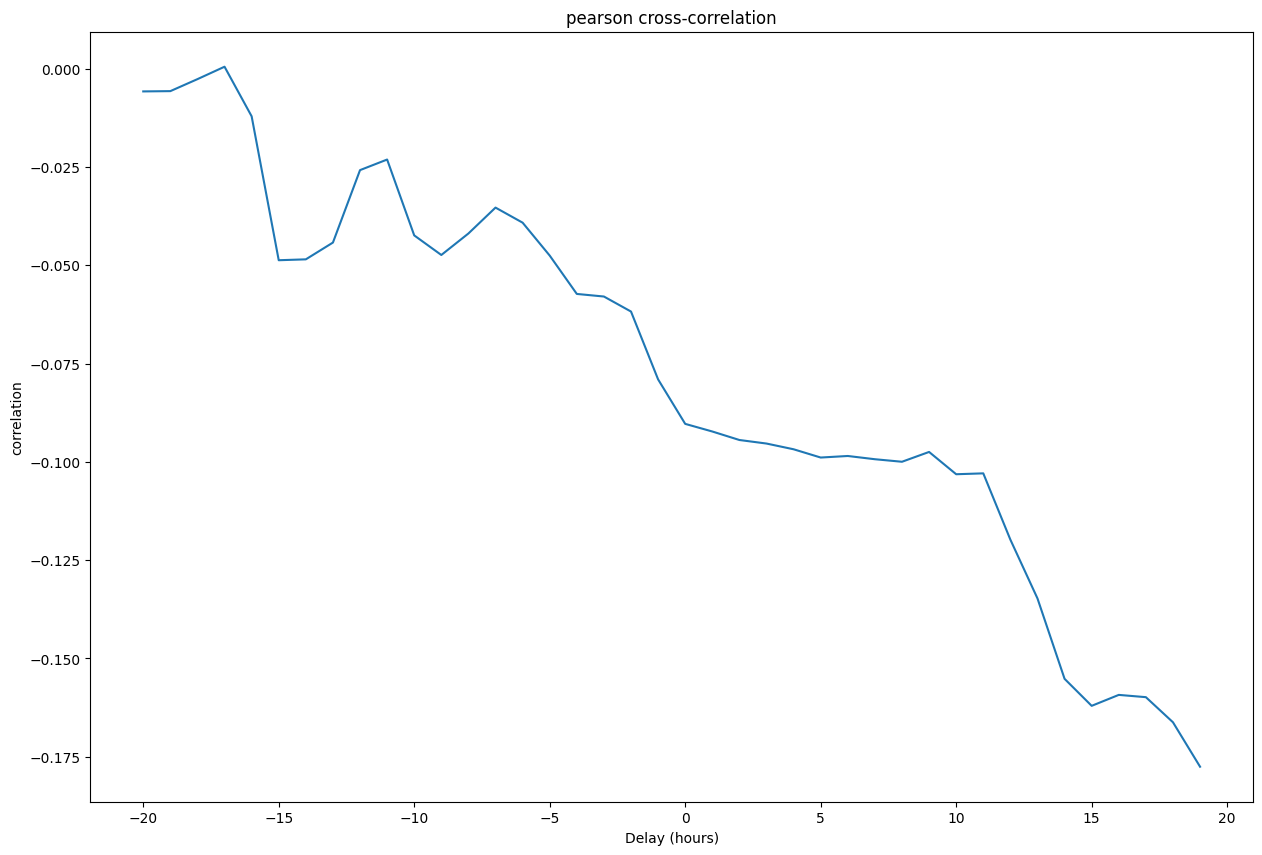

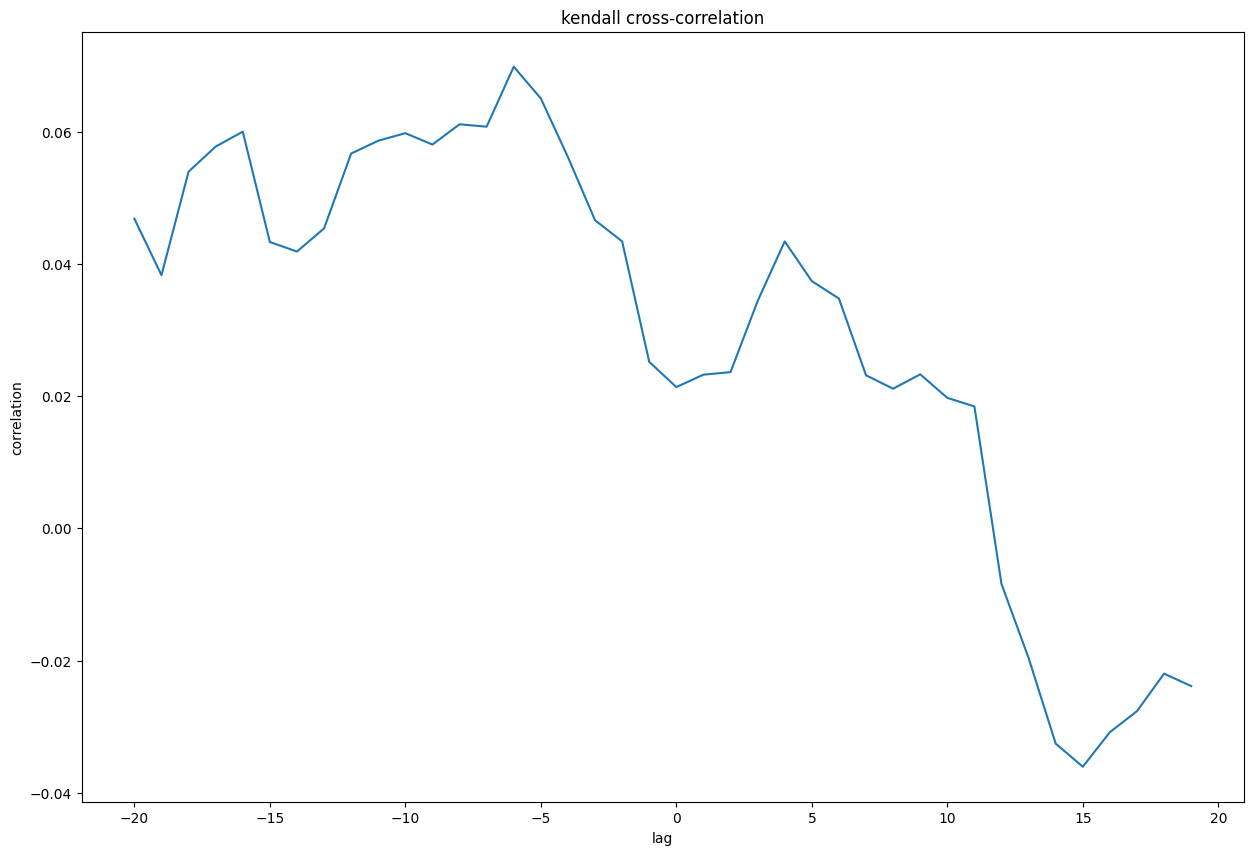

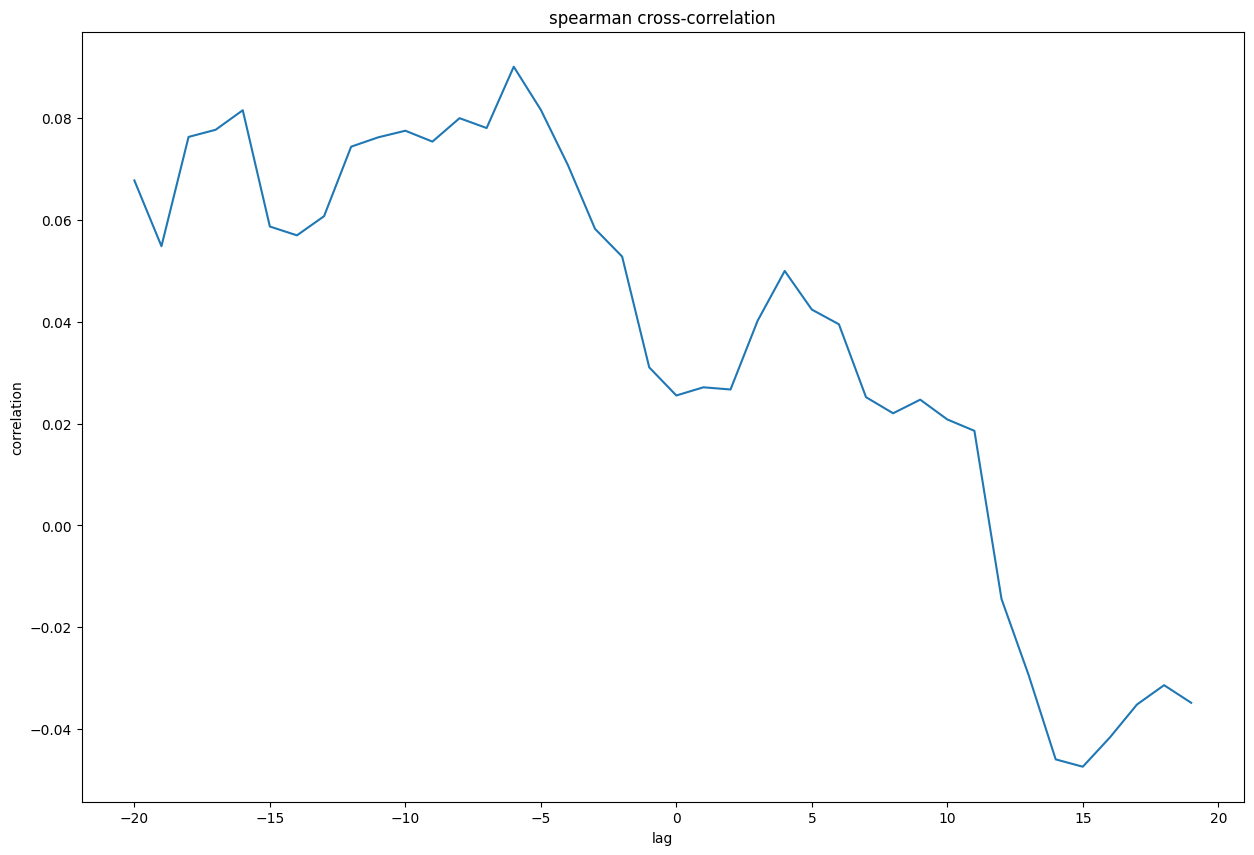

In [ ]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation")
plt.xlabel("Delay (hours)")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

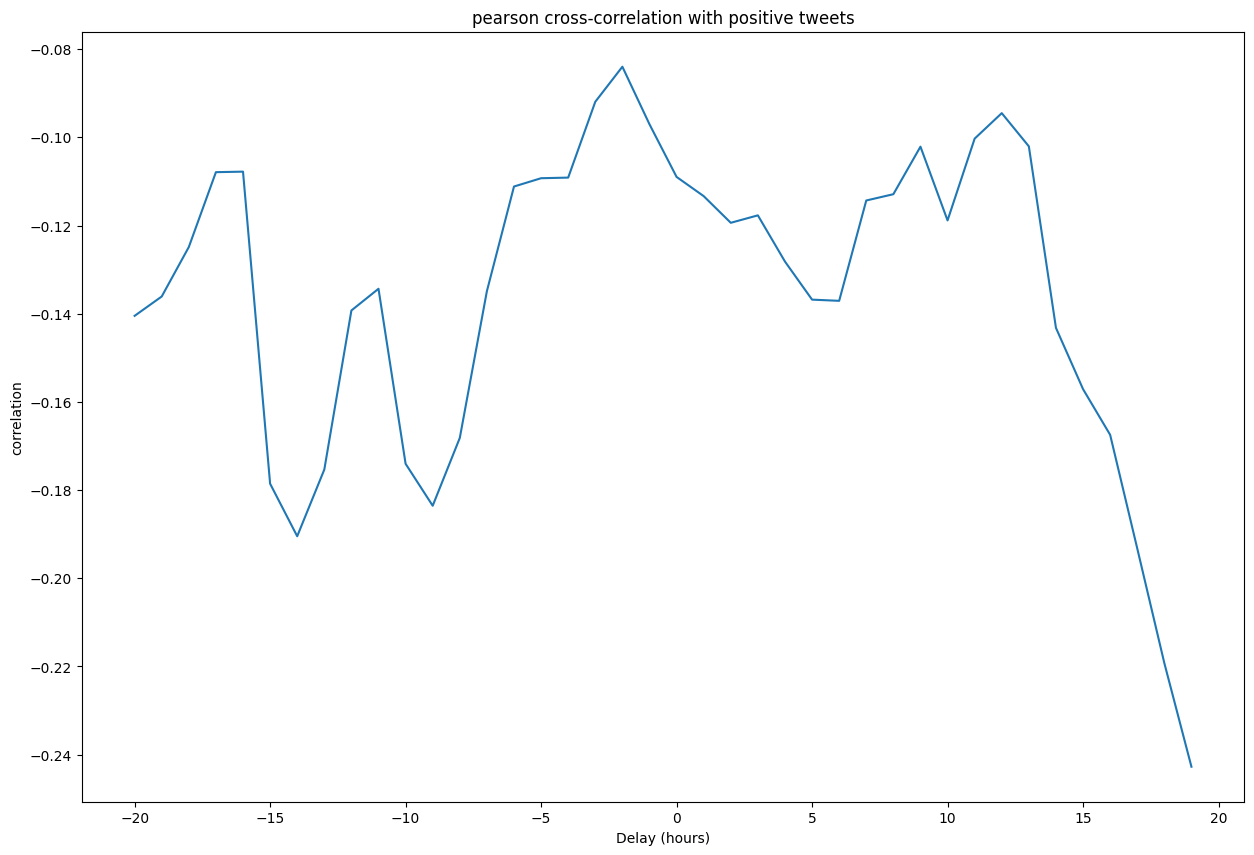

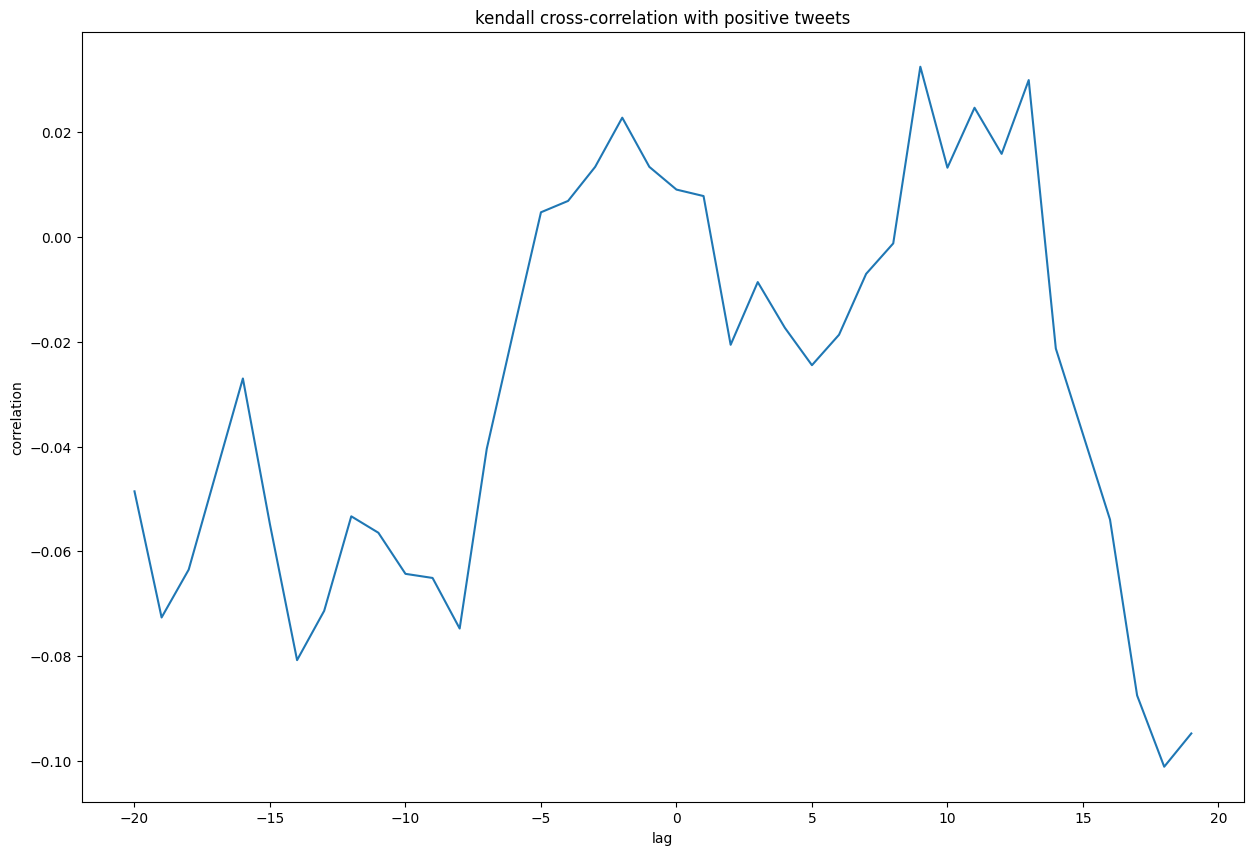

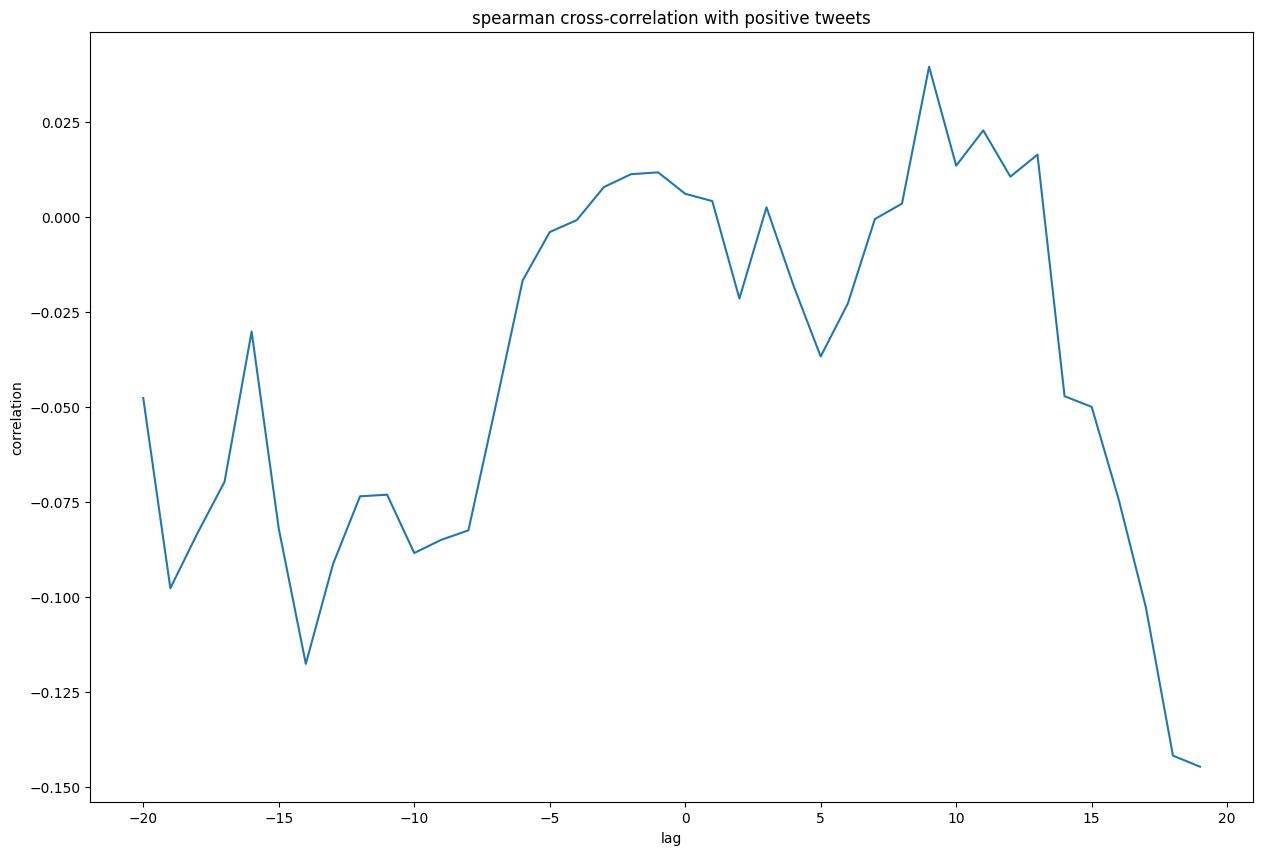

In [ ]:

#similarity between positive tweets and bitcoin proices
xcov = [crosscorr(tweets_grouped_positive, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation with positive tweets")
plt.xlabel("Delay (hours)")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped_positive, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation with positive tweets")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped_positive, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation with positive tweets")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

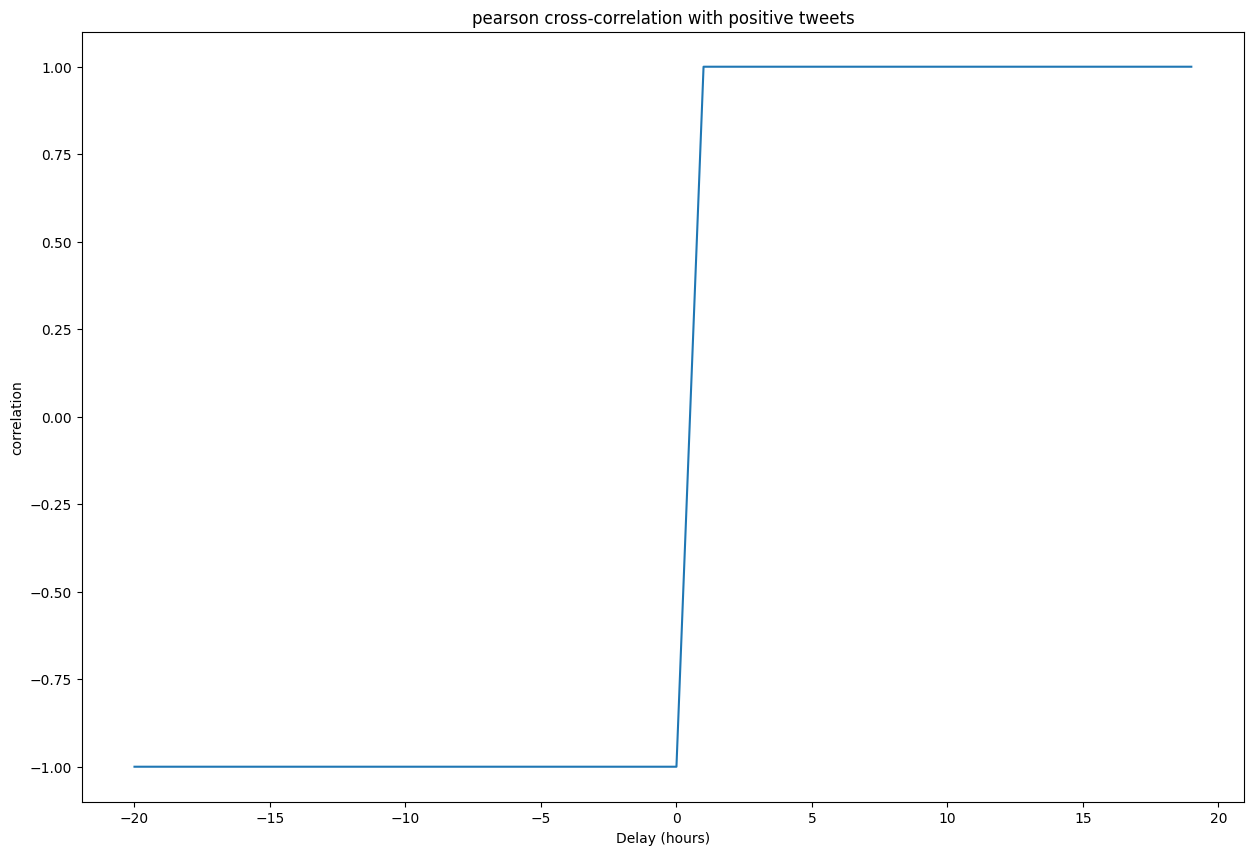

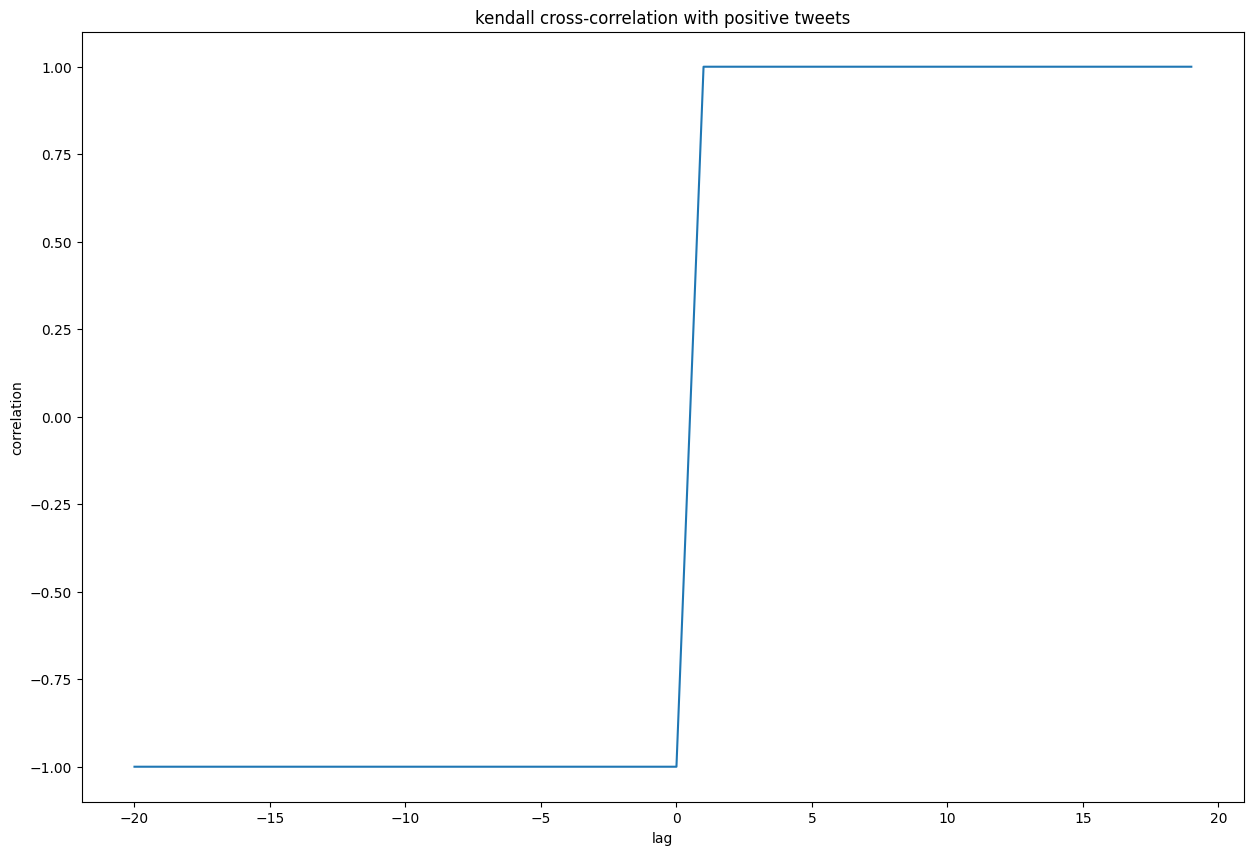

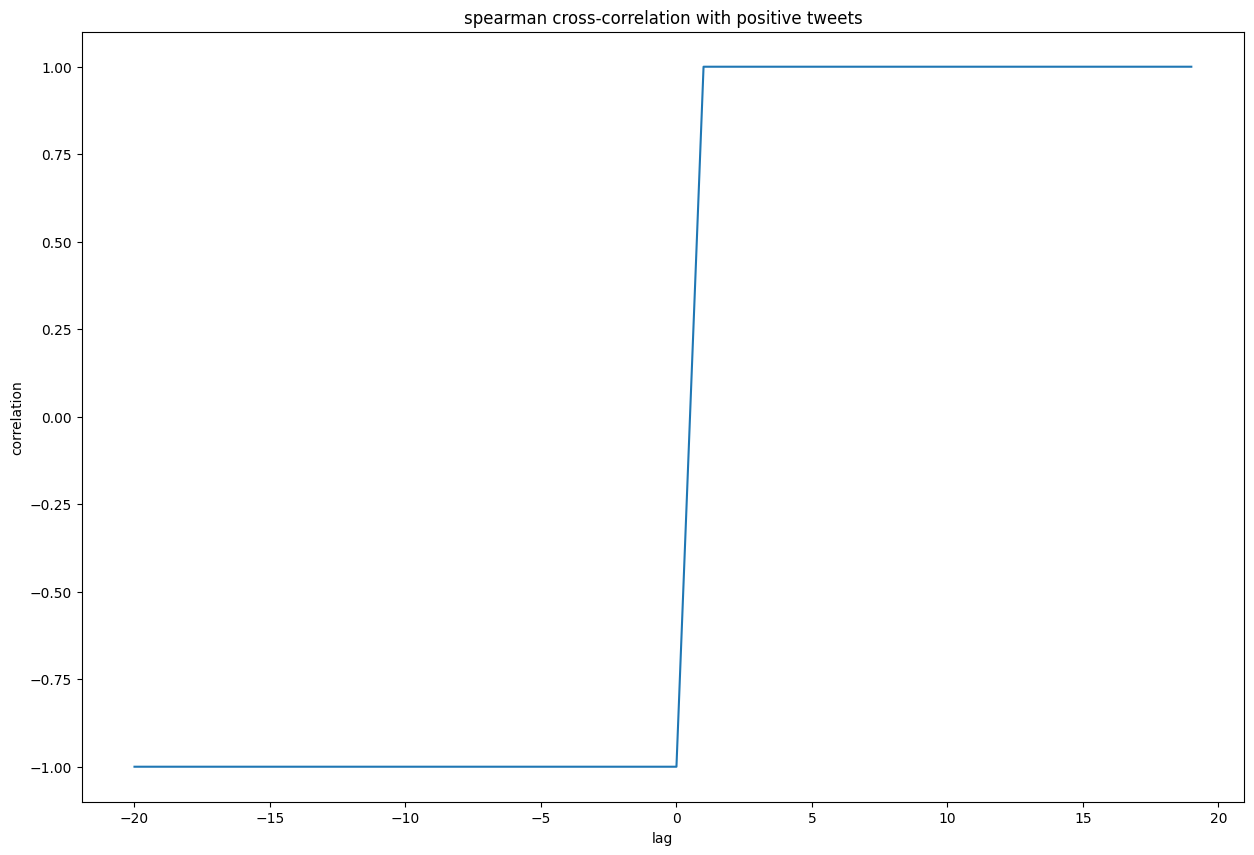

In [ ]:

#similarity between Negative tweets and bitcoin price
xcov = [crosscorr(tweets_grouped_negative, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation with positive tweets")
plt.xlabel("Delay (hours)")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped_negative, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation with positive tweets")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped_negative, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation with negative tweets")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

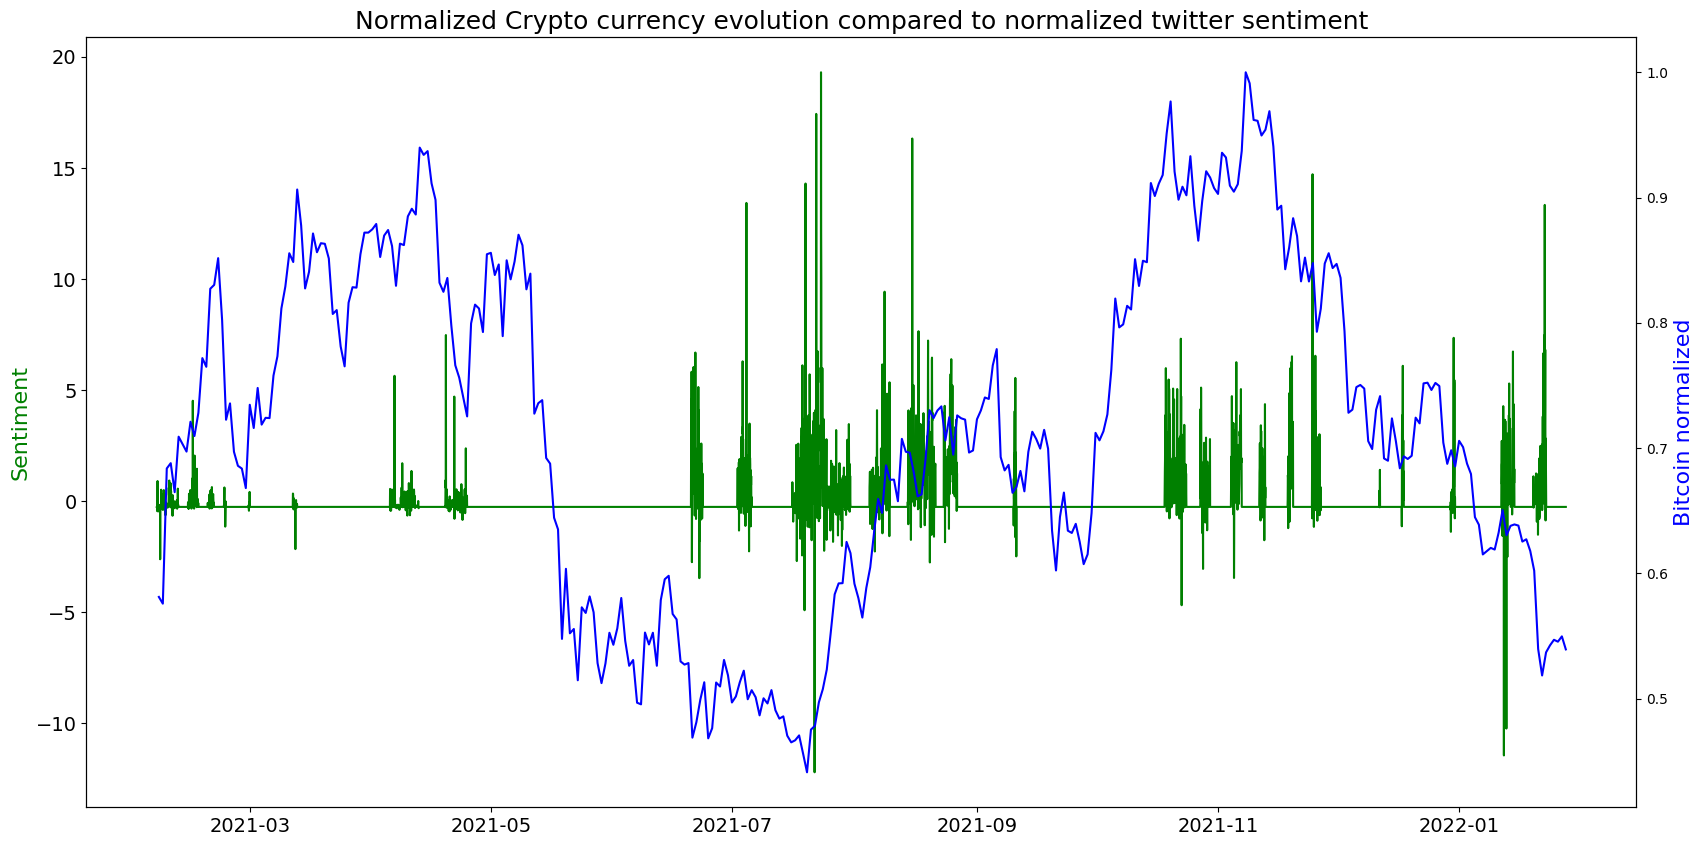

In [ ]:
# Normalise time series data
min_max_scaler = preprocessing.StandardScaler()
score_scaled = min_max_scaler.fit_transform(tweets_grouped['score'].values.reshape(-1,1))
tweets_grouped['normalised_score'] = score_scaled
# crypto_used_grouped_scaled = min_max_scaler.fit_transform(crypto_usd_grouped.values.reshape(-1,1))
crypto_used_grouped_scaled = crypto_usd_grouped / max(crypto_usd_grouped.max(), abs(crypto_usd_grouped.min()))
# crypto_usd_grouped['normalised_price'] = crypto_used_grouped_scaled

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Normalised Crypto currency evolution compared to normalised twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped['normalised_score'], 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_used_grouped_scaled, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin normalised", color='b', fontsize=16)
plt.show()

# Data Exploratioin for Tweets related to BTC

In [ ]:
#df.to_csv('bitcoin_tweets_cleaned.csv')

In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tweet = df_clean.copy()

In [ ]:
tweet2 = df_clean.copy()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:

#set the stopwords list
stopwords= set(STOPWORDS)
crypto_words = ['btc','bitcoin','eth','etherum','crypto', 'HuUzvDmmId', 'Retweet','Comment', 'QR','LHnVArq1Ro', 'Ethereum']
new_stopwords=stopwords.union(crypto_words)

#Wordcloud with stopwords

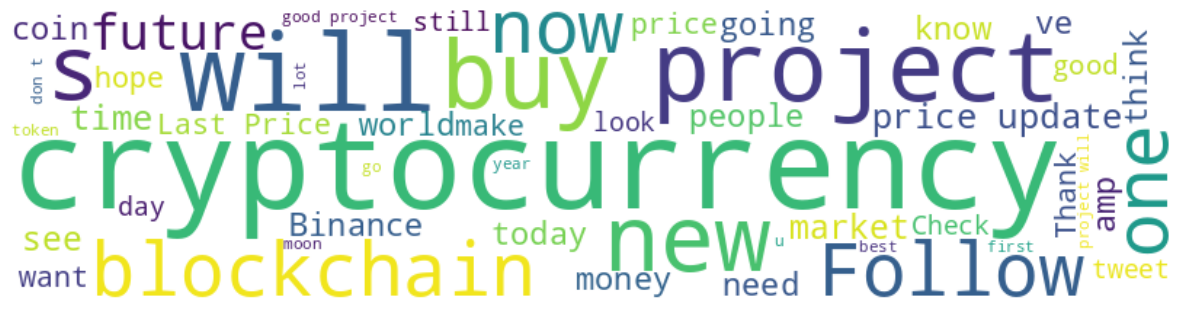

In [ ]:
text1 = " ".join(text for text in tweet2.text)

# Make Wordcloud
word_cloud1 = WordCloud(stopwords=new_stopwords, background_color = 'white', width = 800, height = 200, max_words=50).generate(text1)

# Plot Wordcloud
plt.plot()
plt.imshow(word_cloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text2 = " ".join(text for text in tweet.text)

Wordcloud without stopwords

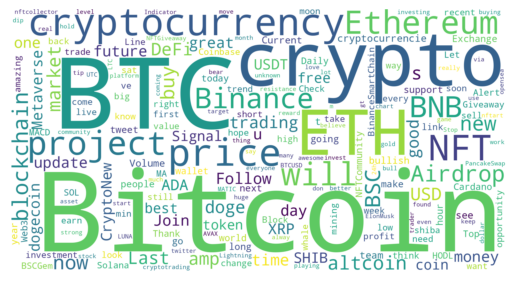

In [ ]:
word_cloud2 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text2)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Packages for visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Packages for images
import cv2
from PIL import Image

# Package for requests
import requests

# Packages for change in markdown
from IPython.display import HTML

# Packages to preprocess the data
import re

# Packages for removing some unwanted outputs("warnings")
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import itertools

def vocab(tweet, col, nb_words, new_stopwords):

    vocab = df[col].str.split(expand=True).stack().value_counts().head(50).to_dict()

    vocab_sw = {key:value for (key,value) in vocab.items() if key not in stopwords}

    return dict(itertools.islice(vocab_sw.items(), nb_words))



    plt.rcParams['figure.figsize'] = (20, 10)
    plt.show()

    plt.xlim(0,len(vocab))
    plt.xticks(rotation=90,fontsize=14)
    plt.bar(vocab.keys(), vocab.values(), width=0.3, color='g')

In [ ]:
def create_corpus(text_data):
    """ Create a corpus from the given text array of sentences """
    corpus = []
    for sentence in text_data:
        for word in sentence.split():
            corpus.append(word)
    return corpus

def top_words(text_corpus, top_n=25, return_dict=False):
    """ Return the top n words from a given corpus """
    def_dict = defaultdict(int)
    for word in text_corpus:
        def_dict[word] += 1
    most_common = sorted(def_dict.items(), key=lambda x : x[1], reverse=True)[:top_n]
    if return_dict:
        return most_common, def_dict
    else:
        return most_common

In [ ]:
# Let's preprocess the verses

# Import nltk stopwords
stopwords = nltk.corpus.stopwords.words('english')
crypto_words = ['btc','bitcoin','eth','etherum','crypto']

stopwords = stopwords + crypto_words

def preprocess_verse(tweet33, stopwords):

    tweet33 = tweet33.lower()

    tweet33 = tweet33.replace('\n\n',' ')

    # remove english stopwords
    tweet33 = ' '.join([word for word in tweet33.split() if word not in stopwords])

    # regular expression that preprocess tweets
    tweet33 = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet33).split())

    return tweet33

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
crypto_words = ['btc','bitcoin','eth','etherum','crypto','1', '0', 'pump','200', '2','24', '115m', '5', 'amp', '000', 'io', 'defi', '10', '3', 'ada', 'bsc']

stopwords = stopwords + crypto_words

def preprocess_tweet(tweet, stopwords):

    tweet = tweet.lower()

    tweet = tweet.replace('\n\n',' ')

    # remove english stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stopwords])

    # regular expression that preprocess tweets
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet).split())

    return tweet

In [ ]:
# bigram function for 2 words
def bigram(s):
    s1 = s.split()
    s1 = list(zip(s1[:-1], s1[1:]))
    s1 = list(map(lambda x: '_'.join(x), s1))

    return ' '.join(s1)

In [ ]:
tweet2.dtypes

index                   int64
user_name              object
user_location          object
user_description       object
user_created           object
user_followers         object
user_friends           object
user_favourites        object
user_verified          object
date                   object
text                   object
hashtags               object
source                 object
is_retweet             object
compound              float64
score                 float64
sentiment              object
verse_preprocessed     object
verse_bigrams          object
dtype: object

In [ ]:
tweet2['text'] = df['text'].astype(str)

In [ ]:
tweet2['verse_preprocessed'] = tweet2['text'].map(lambda x:preprocess_verse(x, stopwords))

In [ ]:
tweet2['verse_bigrams'] = tweet2['text'].map(lambda x:bigram(x))

In [ ]:
def vocab(df, col, nb_words, stopwords):

    vocab = df[col].str.split(expand=True).stack().value_counts().head(50).to_dict()

    vocab_sw = {key:value for (key,value) in vocab.items() if key not in stopwords}

    return dict(itertools.islice(vocab_sw.items(), nb_words))


def plot_words(vocab):

    plt.rcParams['figure.figsize'] = (15, 10)
    plt.show()

    plt.xlim(0,len(vocab))
    plt.xticks(rotation=90,fontsize=14)
    plt.bar(vocab.keys(), vocab.values(), width=0.4, color='g')

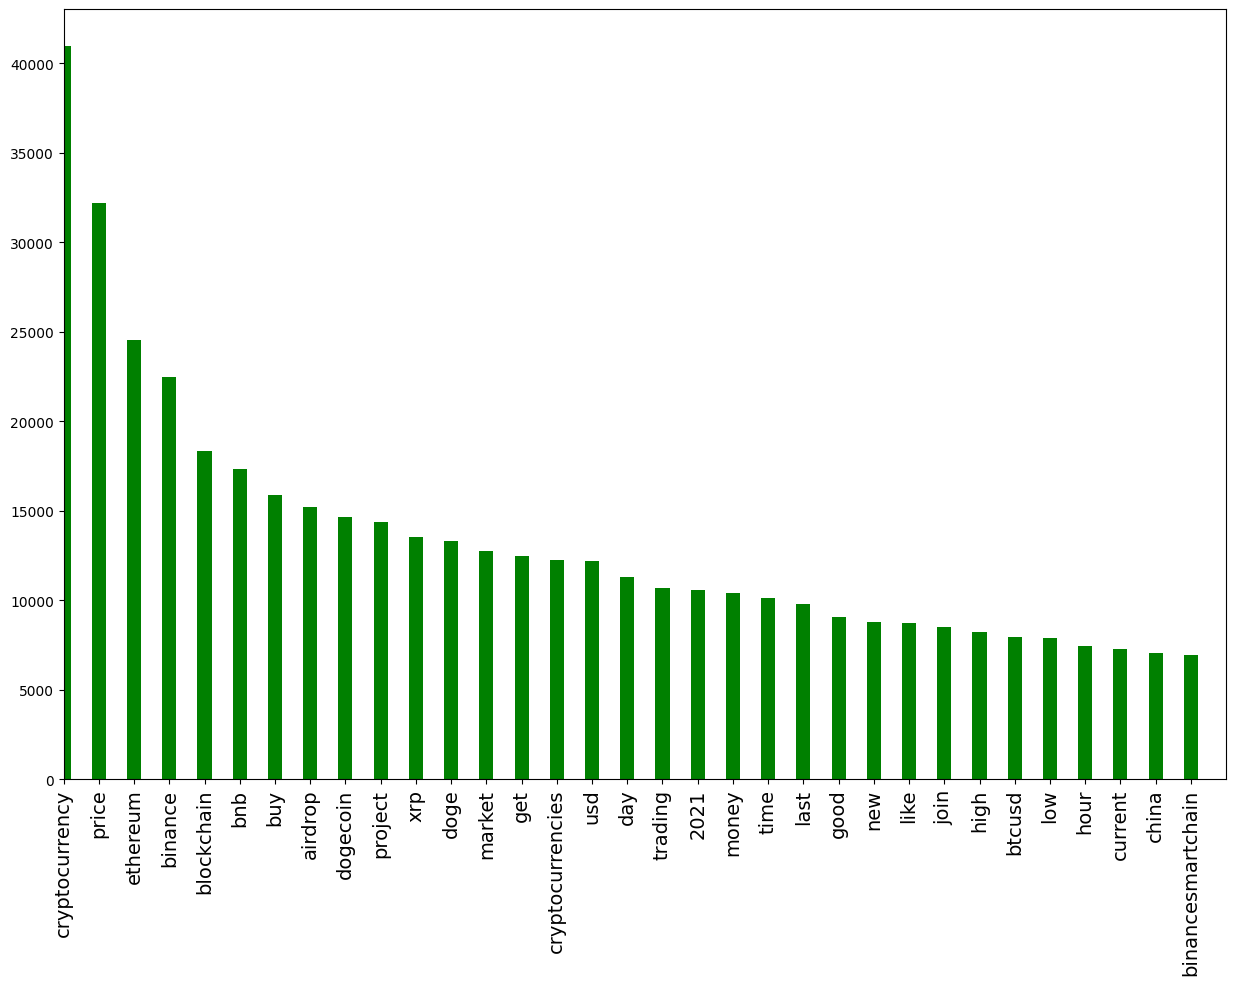

In [ ]:
plot_words(vocab(tweet2, 'verse_preprocessed', 40, stopwords))

NLP Modeling

In [ ]:
df = df_clean.copy()
df.dropna(subset=['hashtags'], inplace=True)
df = df[['text']]
df.columns = ['tweets']
df.head()

,tweets
0,btc causing chaos as usual.
1,I have a question for the crypto community.\n\...
2,remember the time when Bitcoiners said that Bi...
3,Laser eyes will outlast covid !! Bitcoin
4,$BABYCAT an growing financial support in crypt...


In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])

print(stop_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
lem = WordNetLemmatizer()

def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

In [ ]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df.head()

,tweets,cleaned_tweets
0,btc causing chaos as usual.,btc causing chaos usual
1,I have a question for the crypto community.\n\...,I question crypto community Do think entering ...
2,remember the time when Bitcoiners said that Bi...,remember time Bitcoiners said Bitcoin seized g...
3,Laser eyes will outlast covid !! Bitcoin,Laser eye outlast covid Bitcoin
4,$BABYCAT an growing financial support in crypt...,BABYCAT growing financial support crypto world...


In [ ]:
df_tweet_clean= df.copy()

In [ ]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df['date'] = df_clean['date']
#df['date'] = df['date'].apply(lambda x: np.nan if len(str(x)) > 25 else x)
df['date_clean'] = pd.to_datetime(df['date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [ ]:
df.drop(columns='date',inplace=True)
df.head()

,tweets,cleaned_tweets,date_clean
0,btc causing chaos as usual.,btc causing chaos usual,2021-08-26
1,I have a question for the crypto community.\n\...,I question crypto community Do think entering ...,2022-01-20
2,remember the time when Bitcoiners said that Bi...,remember time Bitcoiners said Bitcoin seized g...,2022-11-07
3,Laser eyes will outlast covid !! Bitcoin,Laser eye outlast covid Bitcoin,2021-06-22
4,$BABYCAT an growing financial support in crypt...,BABYCAT growing financial support crypto world...,2022-04-28


In [ ]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df['cleaned_tweets'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df["compound"] = compound
df.head(2)

100%|██████████| 233609/233609 [00:37<00:00, 6153.36it/s]


,tweets,cleaned_tweets,date_clean,compound
0,btc causing chaos as usual.,btc causing chaos usual,2021-08-26,-0.5719
1,I have a question for the crypto community.\n\...,I question crypto community Do think entering ...,2022-01-20,-0.4019


In [ ]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    elif compound >= -0.05 and compound <= 0.05:
        return "neutral"

In [ ]:
df['sentiment'] = df['compound'].apply(lambda val: polarity_score(val))
df.head(),p

,tweets,cleaned_tweets,date_clean,compound,sentiment
0,btc causing chaos as usual.,btc causing chaos usual,2021-08-26,-0.5719,negative
1,I have a question for the crypto community.\n\...,I question crypto community Do think entering ...,2022-01-20,-0.4019,None
2,remember the time when Bitcoiners said that Bi...,remember time Bitcoiners said Bitcoin seized g...,2022-11-07,0.0000,neutral
3,Laser eyes will outlast covid !! Bitcoin,Laser eye outlast covid Bitcoin,2021-06-22,0.0000,neutral
4,$BABYCAT an growing financial support in crypt...,BABYCAT growing financial support crypto world...,2022-04-28,0.5267,positive


In [ ]:
temp2 = df.groupby('sentiment').count()['cleaned_tweets'].reset_index().sort_values(by='cleaned_tweets',ascending=False)
temp2.style.background_gradient(cmap='Purples')

,sentiment,cleaned_tweets
2,positive,124910
1,neutral,75094
0,negative,11546


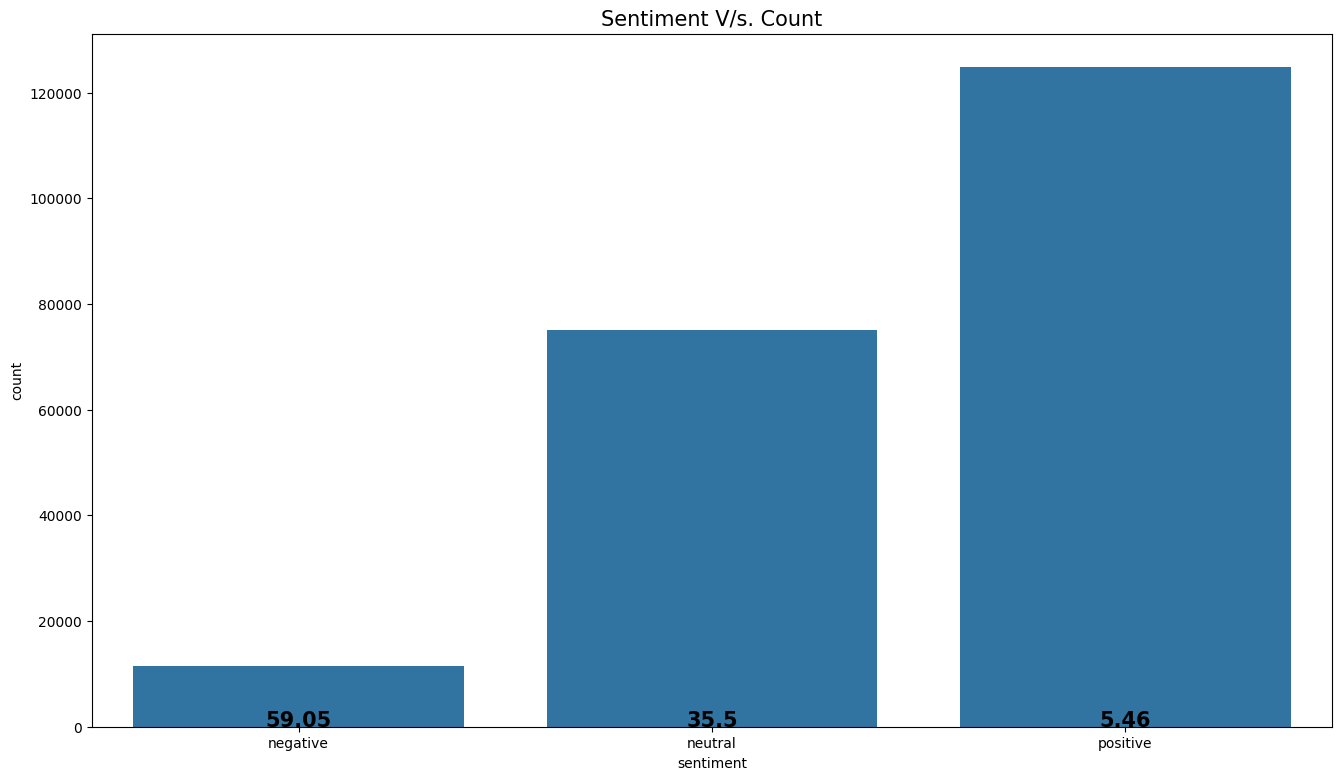

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(data=df, x="sentiment", ax=ax)
#sns.countplot(df.crypto_sentiment)
ax.set_title("Sentiment V/s. Count", fontsize=15)

label = (df.sentiment.value_counts(normalize=True)*100).round(2)
for i in range(3):
    ax.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "black", weight="bold", fontsize=15)

plt.savefig('sentiment_vs_count', dpi=1000)
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.backend as K
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [ ]:
df.head()

,tweets,cleaned_tweets,date_clean,compound,sentiment
0,btc causing chaos as usual.,btc causing chaos usual,2021-08-26,-0.5719,negative
1,I have a question for the crypto community.\n\...,I question crypto community Do think entering ...,2022-01-20,-0.4019,None
2,remember the time when Bitcoiners said that Bi...,remember time Bitcoiners said Bitcoin seized g...,2022-11-07,0.0000,neutral
3,Laser eyes will outlast covid !! Bitcoin,Laser eye outlast covid Bitcoin,2021-06-22,0.0000,neutral
4,$BABYCAT an growing financial support in crypt...,BABYCAT growing financial support crypto world...,2022-04-28,0.5267,positive


In [ ]:
X = df['cleaned_tweets']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [ ]:
seed = 35 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(163526,) (70083,) (163526, 3) (70083, 3)


In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(163526, 30) (70083, 30)


In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 100)               5

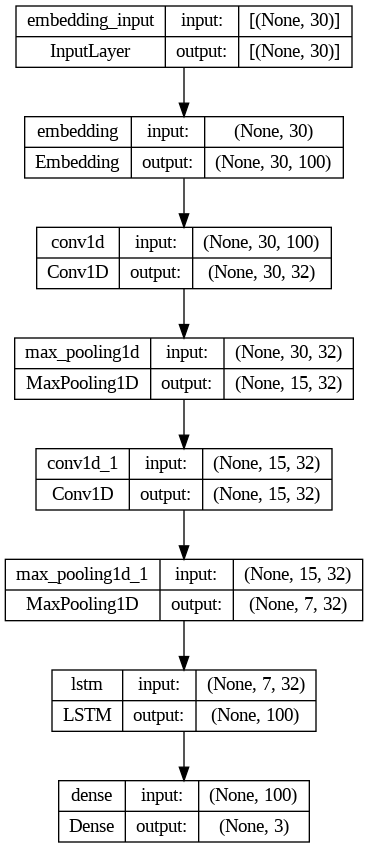

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
1278/1278 - 122s - loss: 0.2620 - accuracy: 0.8324 - val_loss: 0.1401 - val_accuracy: 0.9297 - 122s/epoch - 96ms/step
Epoch 2/10
1278/1278 - 111s - loss: 0.1339 - accuracy: 0.9292 - val_loss: 0.1478 - val_accuracy: 0.9317 - 111s/epoch - 87ms/step
Epoch 3/10
1278/1278 - 108s - loss: 0.1236 - accuracy: 0.9364 - val_loss: 0.1400 - val_accuracy: 0.9496 - 108s/epoch - 84ms/step
Epoch 4/10
1278/1278 - 111s - loss: 0.1168 - accuracy: 0.9452 - val_loss: 0.1338 - val_accuracy: 0.8910 - 111s/epoch - 87ms/step
Epoch 5/10
1278/1278 - 112s - loss: 0.1097 - accuracy: 0.9602 - val_loss: 0.1669 - val_accuracy: 0.9336 - 112s/epoch - 88ms/step
Epoch 6/10
1278/1278 - 108s - loss: 0.1035 - accuracy: 0.9644 - val_loss: 0.1366 - val_accuracy: 0.9345 - 108s/epoch - 84ms/step
Epoch 7/10
1278/1278 - 107s - loss: 0.0962 - accuracy: 0.9681 - val_loss: 0.1454 - val_accuracy: 0.9409 - 107s/epoch - 84ms/step
Epoch 8/10
1278/1278 - 109s - loss: 0.0903 - accuracy: 0.9719 - val_loss: 0.1397 - val_accuracy: 

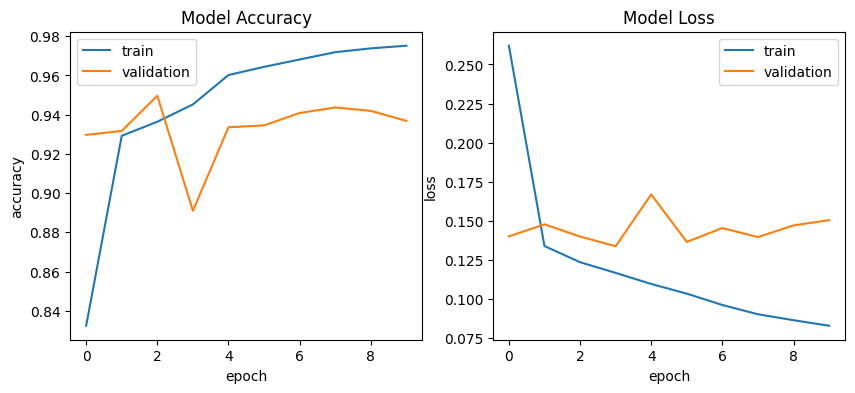

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

    plt.savefig("train_accuracy_loss", dpi=1000)

plot_training_hist(history)

In [ ]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

2191/2191 [==============================] - 20s 9ms/step
Accuracy:	93.7%
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     10082
           1       0.97      0.95      0.96     22528
           2       0.96      0.95      0.96     37473

    accuracy                           0.94     70083
   macro avg       0.91      0.92      0.91     70083
weighted avg       0.94      0.94      0.94     70083





**Topic Modelling (LDA - Latent Drichilet Allocation)**

In my words Topic Modelling is the process of extracting major themes from a given corpus of text data.

Topic models can help to organize and offer insights for us to understand large collections of unstructured text bodies.
Originally developed as a text-mining tool, topic models have also been used to detect instructive structures in data such as genetic information, images, and networks.


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn

In [ ]:
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library



In [ ]:
import pyLDAvis # package to interpret the topics in a topic model
import pyLDAvis.gensim_models # python library for the interactive topic modeling visualization
import pickle # for html export
import pandas as pd # for data processing
import os # for setting working directory
import re # regular expression library
from wordcloud import WordCloud # for generating word clouds
import gensim # open-source library for unsupervised topic modeling, document indexing
from gensim.utils import simple_preprocess
import nltk # python tool kit for NLP
nltk.download('stopwords')
from nltk.corpus import stopwords # for removing stop words
import gensim.corpora as corpora # for mapping words to integers
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['btc','bitcoin','eth','etherum','crypto','1', '0', 'pump','200', '2','24', '115m', '5', 'amp', '000', 'io'])
"""
    Functions for converting sentence to words
"""
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
"""
    Functions removing the stopwords
"""
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

datas = df.cleaned_tweets.values.tolist()#creating the array of token
data_words = list(sent_to_words(datas))#converting them into list

data_words = remove_stopwords(data_words)# remove stop words
print(data_words[:1][0][:30])

['causing', 'chaos', 'usual']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Printing the corpus in a numeric form which implies the frequency of the word
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [ ]:
#Showing the code
id2word

VI. LDA model tranining
Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.040*"price" + 0.028*"last" + 0.015*"tweet" + 0.014*"support" + '
  '0.013*"daily" + 0.010*"wallet" + 0.010*"signal" + 0.009*"resistance" + '
  '0.009*"block" + 0.009*"bullish"'),
 (1,
  '0.069*"project" + 0.042*"bsc" + 0.029*"airdrop" + 0.029*"bnb" + '
  '0.019*"cryptocurrency" + 0.017*"defi" + 0.017*"good" + 0.016*"binance" + '
  '0.015*"future" + 0.015*"great"'),
 (2,
  '0.059*"nft" + 0.036*"nfts" + 0.030*"cryptocurrency" + 0.029*"blockchain" + '
  '0.024*"ethereum" + 0.019*"metaverse" + 0.018*"nftcommunity" + '
  '0.017*"binance" + 0.016*"cryptonews" + 0.013*"free"'),
 (3,
  '0.041*"cryptocurrency" + 0.017*"join" + 0.016*"news" + 0.014*"playing" + '
  '0.013*"found" + 0.013*"awesome" + 0.012*"feg" + 0.011*"vault" + '
  '0.011*"crash" + 0.011*"location"'),
 (4,
  '0.012*"get" + 0.011*"like" + 0.009*"time" + 0.008*"go" + 0.007*"day" + '
  '0.007*"see" + 0.007*"market" + 0.007*"people" + 0.006*"one" + 0.006*"know"'),
 (5,
  '0.028*"buy" + 0.020*"top" + 0.017*"binance" + 0.015

VII. Analysing the LDA Model
Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

Better understanding and interpreting individual topics, and
Better understanding the relationships between the topics.
For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.o transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [ ]:
from gensim.models import LdaModel

from gensim.corpora import Dictionary

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(path3,'02_Results','ldavis_prepared_'+str(num_topics))



In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
! pip install pandas==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


In [ ]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared





PreparedData(topic_coordinates=            x       y  topics  cluster    Freq
topic                                         
4      0.2524  0.1327       1        1 20.7391
1      0.1587 -0.1778       2        1 13.6797
7     -0.0897 -0.1563       3        1 11.2816
9      0.2141  0.1579       4        1 10.3202
2     -0.0011 -0.2192       5        1  9.8713
0     -0.1729  0.1382       6        1  9.2314
6     -0.1248  0.1861       7        1  7.3917
3      0.0357 -0.1142       8        1  6.6681
5     -0.0522  0.0560       9        1  6.4482
8     -0.2205 -0.0034      10        1  4.3687, topic_info=          Term       Freq      Total Category  logprob  loglift
366    project 30713.0000 30713.0000  Default  30.0000  30.0000
205      price 38421.0000 38421.0000  Default  29.0000  29.0000
190        nft 24925.0000 24925.0000  Default  28.0000  28.0000
129        bsc 19050.0000 19050.0000  Default  27.0000  27.0000
33         bnb 26035.0000 26035.0000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
205      price  2537.4514 38421.5550  Topic10  -4.0250   0.4132
243   ethereum  1681.6714 30378.5453  Topic10  -4.4363   0.2367
839        web  1162.3300  6445.6858  Topic10  -4.8057   1.4177
2426   btcusdt   965.0299  2568.7976  Topic10  -4.9917   2.1517
621    airdrop  1155.9031 14179.9186  Topic10  -4.8112   0.6238

[668 rows x 6 columns], token_table=      Topic   Freq          Term
term                            
2542      4 0.9968          aapl
3546      8 0.9991    absolutely
4878      1 0.9986    accumulate
360       2 0.9975       achieve
2105      4 0.9950      actually
...     ...    ...           ...
2004      2 0.9993  yieldfarming
1550      1 0.9982            yu
3246      7 0.9976       yusljvm
1849      9 0.9988           zec
2012      5 0.9995         zesty

[1543 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 8, 10, 3, 1, 7, 4, 6, 9])